# Projecte d'Anàlisi de dades
## M15UF2 | William Marchant y Alejandro Juan
<img src="https://www.aden.org/files/sites/9/2018/05/logotipo_fifa2018_russia.jpg" width="500" height="600">

Descirpción:
Nuestro proyecto va de blabalbalbalbalablablabalablabl.............





#### Primero de todo importamos las liberias que vamos a utilizar:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Leemos nuestro archivo csv con la libreria de pandas

In [10]:
datos = pd.read_csv("src/data/main.csv")
datos.columns=["Date", "Team", "Opponent", "GoalScored", "Ball Possession %", "Attempts", "On-Target", "Off-Target", "Blocked", "Corners", "Offsides", "Free Kicks", "Saves", "Pass Accuracy %", "Passes", "Distance Covered (Kms)", "Fouls Committed", "Yellow Card", "Yellow & Red", "Red", "Man of the Match", "1st Goal", "Round", "PSO", "Goals in PSO", "Own goals", "Own goal Time"]
print(type(datos))

<class 'pandas.core.frame.DataFrame'>


#### Imprimir todos los valores

In [14]:
datos.head

<bound method NDFrame.head of            Date          Team      Opponent  GoalScored  Ball Possession %  \
0    14-06-2018        Russia  Saudi Arabia           5                 40   
1    14-06-2018  Saudi Arabia        Russia           0                 60   
2    15-06-2018         Egypt       Uruguay           0                 43   
3    15-06-2018       Uruguay         Egypt           1                 57   
4    15-06-2018       Morocco          Iran           0                 64   
..          ...           ...           ...         ...                ...   
123  11-07-2018       England       Croatia           1                 46   
124  14-07-2018       Belgium       England           2                 43   
125  14-07-2018       England       Belgium           0                 57   
126  15-07-2018        France       Croatia           4                 39   
127  15-07-2018       Croatia        France           2                 61   

     Attempts  On-Target  Off-Tar

#### Imprimir solo un valor

In [16]:
datos["Corners"]

0      6
1      2
2      0
3      5
4      5
      ..
123    4
124    4
125    5
126    2
127    6
Name: Corners, Length: 128, dtype: int64

#### Obtener el total de goles de un equipo

In [19]:
franceGoals = datos[(datos.Team == "France")]
franceGoals.GoalScored.sum()

14

#### Obtener todas las columnas con diferentes valores (minimo, media, maximo...)

In [21]:
datos.describe()

,GoalScored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


#### Obtener varios campos de varias filas

In [23]:
datos.loc[[6,7], ["Team","Ball Possession %"]]

,Team,Ball Possession %
6,Portugal,39
7,Spain,61


#### Agrupación de los datos por equipo obteniendo su media con la ayuda de NumPy

In [24]:
teams = datos.groupby("Team")
teams.aggregate(np.mean)

,GoalScored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
Team,,,,,,,,,,,,,,,,,,,,,
Argentina,1.500000,63.750000,13.250000,4.500000,4.000000,4.750000,6.000000,1.500000,20.500000,1.500000,...,583.750000,99.750000,13.750000,2.750000,0.000000,0.00,24.666667,0.000000,NaN,NaN
Australia,0.666667,51.000000,10.666667,2.666667,4.666667,3.333333,4.666667,1.000000,12.333333,3.333333,...,488.333333,110.000000,12.333333,2.333333,0.000000,0.00,50.000000,0.000000,1.0,81.0
Belgium,2.285714,52.428571,15.142857,5.714286,5.714286,3.714286,5.571429,1.142857,12.571429,3.857143,...,528.285714,105.000000,14.142857,1.571429,0.000000,0.00,31.666667,0.000000,NaN,NaN
Brazil,1.600000,55.600000,20.600000,7.600000,7.000000,6.000000,8.400000,1.800000,16.800000,1.000000,...,567.800000,101.800000,10.000000,1.400000,0.000000,0.00,49.250000,0.000000,1.0,13.0
Colombia,1.500000,50.250000,9.750000,3.000000,3.500000,3.250000,3.250000,1.750000,14.750000,2.500000,...,453.250000,109.250000,15.750000,2.250000,0.000000,0.25,60.750000,0.750000,NaN,NaN
Costa Rica,0.666667,41.333333,9.333333,3.000000,4.333333,2.000000,3.666667,1.666667,14.000000,3.333333,...,349.000000,106.333333,14.333333,2.000000,0.000000,0.00,56.000000,0.000000,NaN,NaN
Croatia,2.000000,55.142857,16.428571,4.142857,8.285714,4.000000,5.714286,1.285714,17.571429,2.857143,...,558.000000,117.571429,16.285714,2.142857,0.000000,0.00,39.571429,1.000000,NaN,NaN
Denmark,0.750000,45.250000,10.000000,3.000000,5.500000,1.500000,4.500000,1.250000,9.500000,5.250000,...,411.000000,115.750000,13.500000,1.500000,0.000000,0.00,22.333333,0.500000,NaN,NaN
Egypt,0.666667,45.000000,9.666667,1.666667,5.666667,2.333333,2.000000,1.333333,8.666667,3.000000,...,396.666667,109.333333,12.666667,1.666667,0.000000,0.00,34.500000,0.000000,1.0,47.0


#### Ahora vamos a exportar este dataset que hemos generado a un nuevo archivo csv.

In [53]:
mediana = teams.aggregate(np.mean)
mediana.to_csv("src/data/mediana.csv")

#### Obtener la suma de los diferentes datos agrupados por equipo

In [29]:
datos.groupby("Team").sum()

,GoalScored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
Team,,,,,,,,,,,,,,,,,,,,,
Argentina,6,255,53,18,16,19,24,6,82,6,...,2335,399,55,11,0,0,74.0,0,0.0,0.0
Australia,2,153,32,8,14,10,14,3,37,10,...,1465,330,37,7,0,0,100.0,0,1.0,81.0
Belgium,16,367,106,40,40,26,39,8,88,27,...,3698,735,99,11,0,0,190.0,0,0.0,0.0
Brazil,8,278,103,38,35,30,42,9,84,5,...,2839,509,50,7,0,0,197.0,0,1.0,13.0
Colombia,6,201,39,12,14,13,13,7,59,10,...,1813,437,63,9,0,1,243.0,3,0.0,0.0
Costa Rica,2,124,28,9,13,6,11,5,42,10,...,1047,319,43,6,0,0,56.0,0,0.0,0.0
Croatia,14,386,115,29,58,28,40,9,123,20,...,3906,823,114,15,0,0,277.0,7,0.0,0.0
Denmark,3,181,40,12,22,6,18,5,38,21,...,1644,463,54,6,0,0,67.0,2,0.0,0.0
Egypt,2,135,29,5,17,7,6,4,26,9,...,1190,328,38,5,0,0,69.0,0,1.0,47.0


#### Obtener los goles totales de los equipos 

In [35]:
datos.groupby("Team")['GoalScored'].sum()

Team
Argentina          6
Australia          2
Belgium           16
Brazil             8
Colombia           6
Costa Rica         2
Croatia           14
Denmark            3
Egypt              2
England           12
France            14
Germany            2
Iceland            2
Iran               2
Japan              6
Korea Republic     3
Mexico             3
Morocco            2
Nigeria            3
Panama             2
Peru               2
Poland             2
Portugal           6
Russia            11
Saudi Arabia       2
Senegal            4
Serbia             2
Spain              7
Sweden             6
Switzerland        5
Tunisia            5
Uruguay            7
Name: GoalScored, dtype: int64

#### Ahora vamos a crear una grafica con los goles totales por equipo

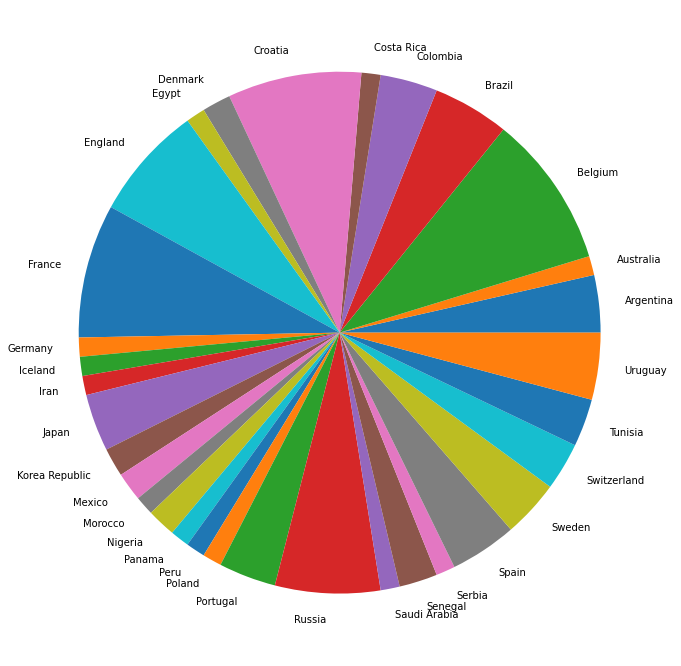

In [32]:
plt.pie(datos.groupby("Team")['GoalScored'].sum(), labels=datos.groupby("Team")["Team"].min())
fig = plt.gcf()
fig.set_size_inches(12,12) 
plt.show()

#### Grafica con los partidos jugados por equipo

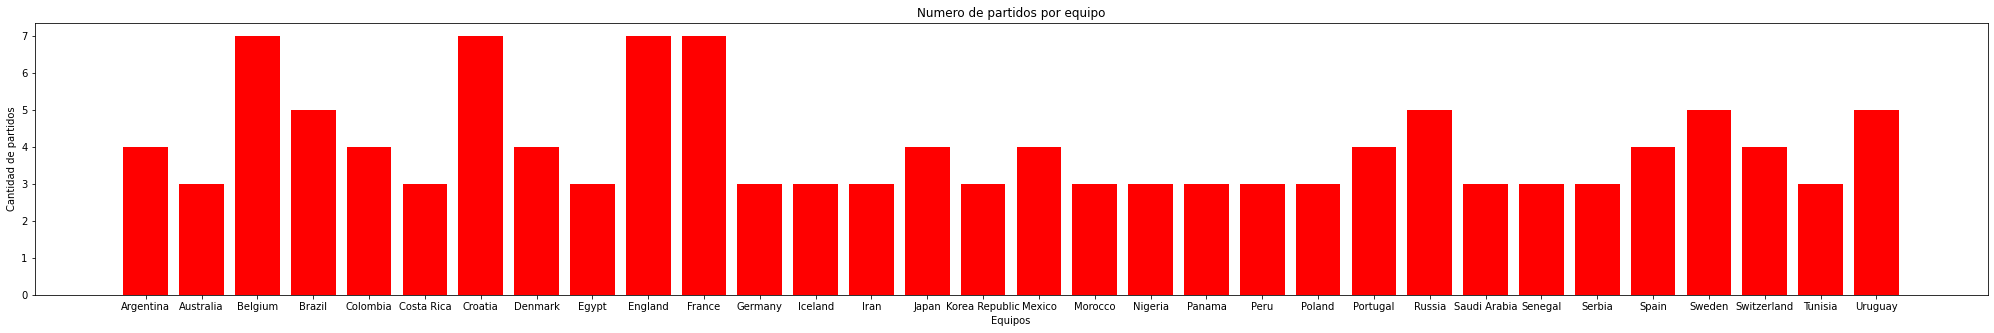

In [97]:
eje_x = datos.groupby("Team")["Team"].min()
eje_y = datos.groupby("Team")['Team'].count()
plt.bar(eje_x, eje_y, color="red")
plt.ylabel('Cantidad de partidos')
plt.xlabel('Equipos')
plt.title('Numero de partidos por equipo')
fig = plt.gcf()
fig.set_size_inches(35,5) 
plt.show()

## TRABAJANDO CON CLASES:

In [3]:
from src.classes.LoadMatchData import LoadMatchData
from src.classes.Match import Match
from src.classes.Team import Team
from src.classes.FootballTeam import National
import pandas, json

data = LoadMatchData("./src/data/main.csv")
partidos = data.getGames()

for partido in partidos:
    print(partido)

14-06-2018 | Russia - Saudi Arabia
15-06-2018 | Egypt - Uruguay
15-06-2018 | Morocco - Iran
15-06-2018 | Portugal - Spain
16-06-2018 | France - Australia
16-06-2018 | Argentina - Iceland
16-06-2018 | Peru - Denmark
17-06-2018 | Croatia - Nigeria
17-06-2018 | Costa Rica - Serbia
17-06-2018 | Germany - Mexico
17-06-2018 | Brazil - Switzerland
18-06-2018 | Sweden - Korea Republic
18-06-2018 | Belgium - Panama
18-06-2018 | Tunisia - England
19-06-2018 | Colombia - Japan
19-06-2018 | Poland - Senegal
19-06-2018 | Russia - Egypt
20-06-2018 | Portugal - Morocco
20-06-2018 | Uruguay - Saudi Arabia
20-06-2018 | Iran - Spain
21-06-2018 | Denmark - Australia
21-06-2018 | France - Peru
21-06-2018 | Argentina - Croatia
22-06-2018 | Brazil - Costa Rica
22-06-2018 | Nigeria - Iceland
22-06-2018 | Serbia - Switzerland
23-06-2018 | Belgium - Tunisia
23-06-2018 | Korea Republic - Mexico
23-06-2018 | Germany - Sweden
24-06-2018 | England - Panama
24-06-2018 | Japan - Senegal
24-06-2018 | Poland - Colombi

In [2]:
for partido in partidos:
    if partido.getDate() == "23-06-2018":
        print(partido)

23-06-2018 | Belgium - Tunisia
23-06-2018 | Korea Republic - Mexico
23-06-2018 | Germany - Sweden


In [2]:
partido = data.getMatchById("23-06-2018 | Korea Republic - Mexico")
partido.displayHighLights()

Korea Republic - Mexico
1 goals 2
17 attempts 13
6 on target 5
41% possession % 59%
346 passes 485
82% pass accuracy %89%
4 yellow cards 0
0 red cards 0
None


In [3]:
def loadNationalTeams():
    df = pandas.read_csv("./src/data/main.csv")
    data = json.loads(df.to_json(orient="records"))
    lista = []

    for item in data:
        exists = False
        national = National(item["Team"])
        national.setCountry(item["Team"])
        for i in lista:
            if i.__eq__(national):
                exists = True
                break
        
        if not exists:
            lista.append(national)

    return tuple(lista)

nationalTeams = loadNationalTeams()

key = 1
for i in nationalTeams:
    print(key, i, sep=". ")
    key += 1

1. Russia
2. Saudi Arabia
3. Egypt
4. Uruguay
5. Morocco
6. Iran
7. Portugal
8. Spain
9. France
10. Australia
11. Argentina
12. Iceland
13. Peru
14. Denmark
15. Croatia
16. Nigeria
17. Costa Rica
18. Serbia
19. Germany
20. Mexico
21. Brazil
22. Switzerland
23. Sweden
24. Korea Republic
25. Belgium
26. Panama
27. Tunisia
28. England
29. Colombia
30. Japan
31. Poland
32. Senegal
